![Screenshot 2025-09-03 023200.png](<attachment:Screenshot 2025-09-03 023200.png>)
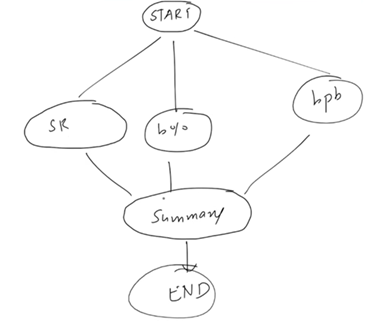

### State needed :
1. Strike_rate
2. boundary_percent
3. boundary_per_ball
4. summary

In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [11]:
class BatsmanState(TypedDict):
    
    runs : int
    balls : int
    fours : int
    sixes : int
    
    sr : float
    bpb : float
    boundary_percent : float
    summary : str
    

### NOTE : In parallel workflow -> we only return the required state attribute which is being calculated in the node, not the entire state in the end of each node as  a dictionary.

In [12]:
# function to calculate strik_rate

def calculate_sr(state : BatsmanState):
    
    sr = (state['runs']/state['balls'])*100
    state['sr'] = sr
    
    return {'sr':sr}

In [13]:
# function to calculate balls per boundary

def calculate_bpb(state:BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    
    state['bpb'] = bpb
    
    return {'bpb':bpb}

In [14]:
# function to calculate boundary_percentage

def calculate_boundary_percent(state : BatsmanState):
    
    runs_in_boundary = (state['fours'] * 4 + state['sixes'] * 6)
    boundary_percent = (runs_in_boundary / state['balls'])*100
    
    state['boundary_percent'] = boundary_percent
    
    return {'boundary_percent':boundary_percent}

In [15]:
# give the summary

def summary(state : BatsmanState):
    
    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percent - {state['boundary_percent']}Strike Rate - {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percent - {state['boundary_percent']}
    """
    
    return {'summary': summary}

![Screenshot 2025-09-03 023200.png](<attachment:Screenshot 2025-09-03 023200.png>)
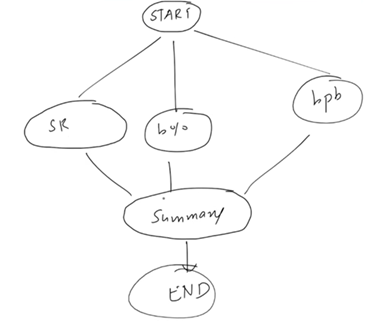

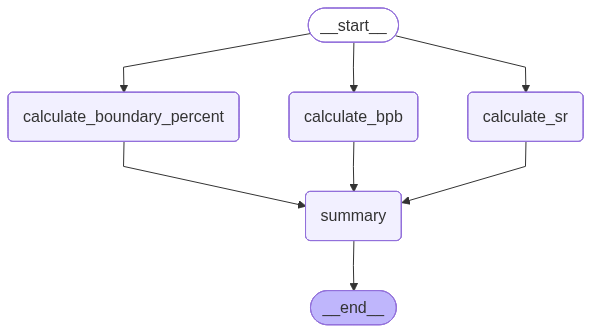

In [16]:
graph = StateGraph(BatsmanState)

# nodes
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)

# edges -> as these are parallel
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

graph.compile()

In [17]:
workflow = graph.compile()

# add initial_state

intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 96.0,
 'summary': '\n    Strike Rate - 200.0 \n\n    Balls per boundary - 5.0 \n\n    Boundary percent - 96.0Strike Rate - 200.0 \n\n    Balls per boundary - 5.0 \n\n    Boundary percent - 96.0\n    '}